**연습 문제 7-3**

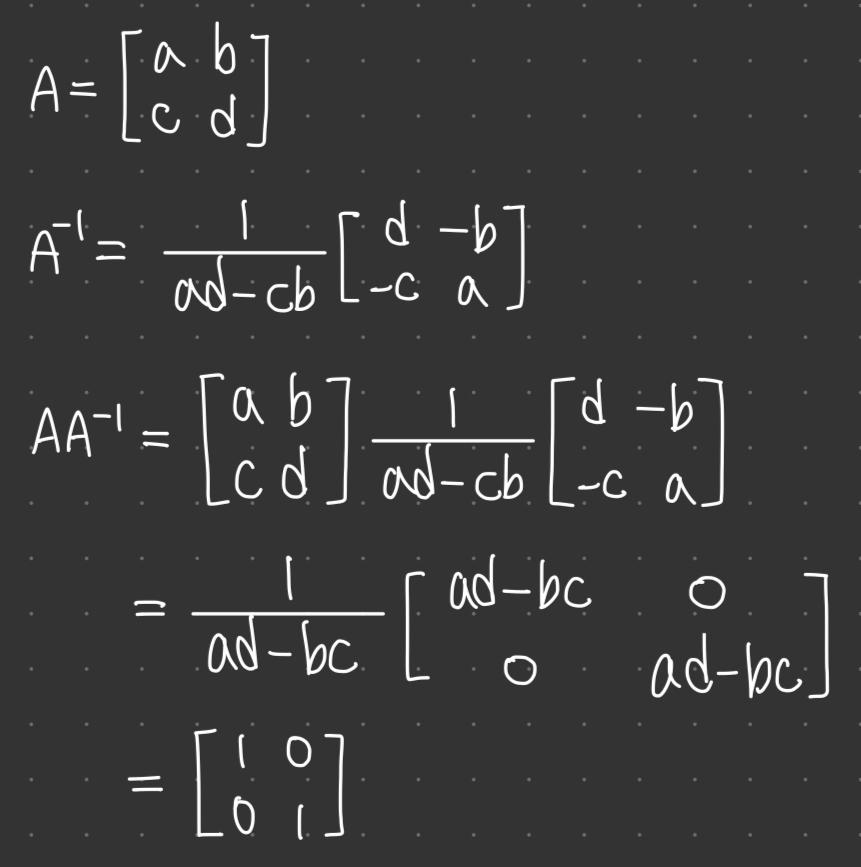

**연습 문제 7-4**

In [3]:
import numpy as np

W = np.random.randint(-10,11,size=(4,40))
WWt = W@W.T
WWt_inv = np.linalg.inv(WWt)
R = WWt_inv @ WWt

In [ ]:
# 정답

# Start from the code for the left-inverse, and swap as necessary.

# here's a wide matrix.
W = np.random.randint(-10,11,size=(4,40))

# confirm that it has its maximum possible rank (full row-rank)
print( f'This matrix has rank={np.linalg.matrix_rank(W)}\n\n' )

# next, create a square full-rank matrix
WWt = W@W.T

# check whether it has an inverse
WWt_inv = np.linalg.inv(WWt)
print( np.round(WWt_inv@WWt,4) )

# finish creating the right-inverse

# our right-inverse
R = W.T @ WWt_inv

# confirm that it works
print( np.round( W@R,6 ) ), print(' ')

# but it's one-sided!
print( np.round( R@W,6 ) )

# visualize! of course :)

fig,axs = plt.subplots(2,2,figsize=(10,10))

axs[0,0].imshow(W,cmap='gray')
axs[0,0].set_title('Wide matrix')

axs[0,1].imshow(R,cmap='gray')
axs[0,1].set_title('Right inverse')

axs[1,0].imshow(R@W,cmap='gray')
axs[1,0].set_title('R@W')

axs[1,1].imshow(W@R,cmap='gray')
axs[1,1].set_title('W@R')

for a in axs.flatten():
  a.set_xticks([])
  a.set_yticks([])

plt.tight_layout()
plt.show()

**연습 문제 7-5**

In [22]:
# 가역 행렬의 완전 역행렬

A = np.random.randn(5,5)

A_inv = np.linalg.inv(A)
A_pinv = np.linalg.pinv(A)

print(A_inv-A_pinv)
print(np.round(A_inv-A_pinv,10))

# 높은 최대열계수 행렬의 왼쪽 역행렬

B = np.random.randn(10,5)

BtB = B.T @ B
B_linv = np.linalg.inv(BtB) @ B.T
B_pinv = np.linalg.pinv(B)

print(np.round(B_linv-B_pinv,10))

# 넓은 최대열계수 행렬의 오른쪽 역행렬

C = np.random.randn(5,10)

CCt = C @ C.T
C_linv = C.T @ np.linalg.inv(CCt)
C_pinv = np.linalg.pinv(C)

print(np.round(C_linv-C_pinv,10))

[[ 1.16226473e-16  2.22044605e-16 -9.43689571e-16 -2.22044605e-16
  -2.22044605e-16]
 [ 1.66533454e-16 -4.44089210e-16  1.11022302e-16  6.93889390e-18
   3.60822483e-16]
 [ 2.22044605e-16 -1.77635684e-15  1.33226763e-15  2.22044605e-16
   1.11022302e-16]
 [-1.38777878e-17 -2.77555756e-16 -1.11022302e-16 -1.38777878e-17
   8.32667268e-17]
 [ 5.55111512e-17  0.00000000e+00 -2.64979011e-16 -5.55111512e-17
  -1.11022302e-16]]
[[ 0.  0. -0. -0. -0.]
 [ 0. -0.  0.  0.  0.]
 [ 0. -0.  0.  0.  0.]
 [-0. -0. -0. -0.  0.]
 [ 0.  0. -0. -0. -0.]]
[[ 0.  0.  0. -0. -0. -0. -0.  0.  0.  0.]
 [ 0. -0. -0.  0. -0.  0.  0. -0. -0. -0.]
 [ 0.  0.  0. -0. -0.  0. -0.  0.  0. -0.]
 [ 0.  0. -0. -0. -0.  0.  0.  0.  0. -0.]
 [ 0.  0.  0.  0. -0. -0.  0.  0.  0.  0.]]
[[ 0.  0.  0. -0. -0.]
 [ 0.  0.  0. -0. -0.]
 [ 0. -0. -0.  0.  0.]
 [-0.  0.  0. -0.  0.]
 [-0. -0. -0.  0. -0.]
 [ 0. -0. -0.  0.  0.]
 [-0.  0.  0. -0. -0.]
 [-0.  0.  0. -0. -0.]
 [-0.  0.  0. -0. -0.]
 [-0.  0.  0.  0.  0.]]


In [12]:
# 정답

# Full inverse case
M = 4

A = np.random.randn(M,M)

Ainv  = np.linalg.inv(A)
Apinv = np.linalg.pinv(A)

np.round( Ainv-Apinv,10 )

# left inverse case
M,N = 14,4

A = np.random.randn(M,N)

ALeft = np.linalg.inv(A.T@A) @ A.T
Apinv = np.linalg.pinv(A)

np.round( ALeft-Apinv,10 )

M,N = 4,14

A = np.random.randn(M,N)

ARight = A.T @ np.linalg.inv(A@A.T)
Apinv  = np.linalg.pinv(A)

np.round( ARight-Apinv,10 )

array([[-0.,  0., -0., -0.],
       [-0.,  0.,  0., -0.],
       [-0., -0., -0., -0.],
       [ 0., -0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [-0., -0., -0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [-0., -0., -0., -0.],
       [ 0.,  0.,  0.,  0.],
       [ 0., -0.,  0., -0.],
       [ 0.,  0., -0.,  0.],
       [-0.,  0., -0.,  0.],
       [ 0., -0.,  0., -0.],
       [ 0., -0.,  0., -0.]])

**연습 문제 7-9**

In [23]:
def Hilbert_matrix(n):
    H = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            H[i,j] = 1 / (i+j+1)
    return H

print(Hilbert_matrix(5))

from scipy.linalg import hilbert
print(hilbert(5))

[[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]
[[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]


[[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]
 
[[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]


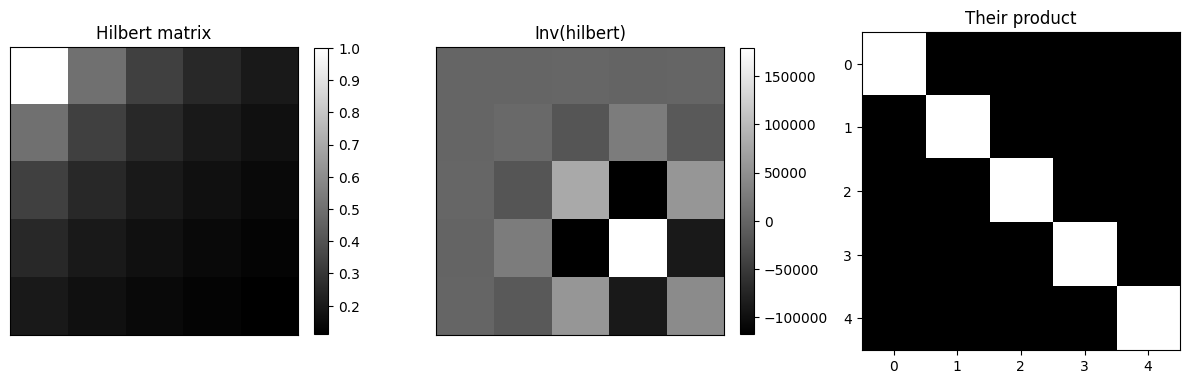

In [25]:
# 정답

import matplotlib.pyplot as plt

# a function to create a Hilbert matrix
def hilbmat(k):
  H = np.zeros((k,k))
  for i in range(k):
    for j in range(k):

      # note: the math formula has denominator: i+j-1
      #   but with 0-based indexing, this is: (i+1)+(j+1)-1
      #   which can be shortened to: i+j+1

      H[i,j] = 1 / (i+j+1)
  return H



# The double for-loop above is a direct implementation of the math.
# The function below gives the same result but without the loops.
def hilbmat(k):
  k = np.arange(1,k+1).reshape(1,-1) # reshape to a row vector (instead of a 1D array)
  return 1 / (k.T+k-1) # outer product and element-wise division

print( hilbmat(5) ), print(' ')

# you can confirm the accuracy of your function against the scipy Hilbert-matrix function:
from scipy.linalg import hilbert
print( hilbert(5) )

# create a 5x5 Hilbert matrix and show it, its inverse, and their product
H = hilbmat(5)
Hi = np.linalg.inv(H)

fig,axs = plt.subplots(1,3,figsize=(12,6))
h = [0,0,0]

# the matrix
h[0] = axs[0].imshow(H,cmap='gray')
axs[0].set_title('Hilbert matrix')

# its inverse
h[1] = axs[1].imshow(Hi,cmap='gray')
axs[1].set_title('Inv(hilbert)')

# their product
h[2] = axs[2].imshow(H@Hi,cmap='gray')
axs[2].set_title('Their product')


for i in range(2):
  fig.colorbar(h[i],ax=axs[i],fraction=.045)
  axs[i].set_xticks([])
  axs[i].set_yticks([])

plt.tight_layout()
plt.savefig('Figure_07_05.png',dpi=300)
plt.show()

**연습 문제 7-10**

In [29]:
from scipy.linalg import hilbert

M = 4
H = hilbert(M)
H_inv = np.linalg.inv(H)

np.round(H @ H_inv - np.eye(M),10)
np.linalg.norm(H-H_inv, 'fro')

10342.081525462412

In [30]:
Cond = []
Euclid = []

for i in range(3,13):
    H = hilbert(i)
    H_inv = np.linalg.inv(H)
    Euclid.append(np.linalg.norm(H-H_inv, 'fro'))
    Cond.append(np.linalg.cond(H))

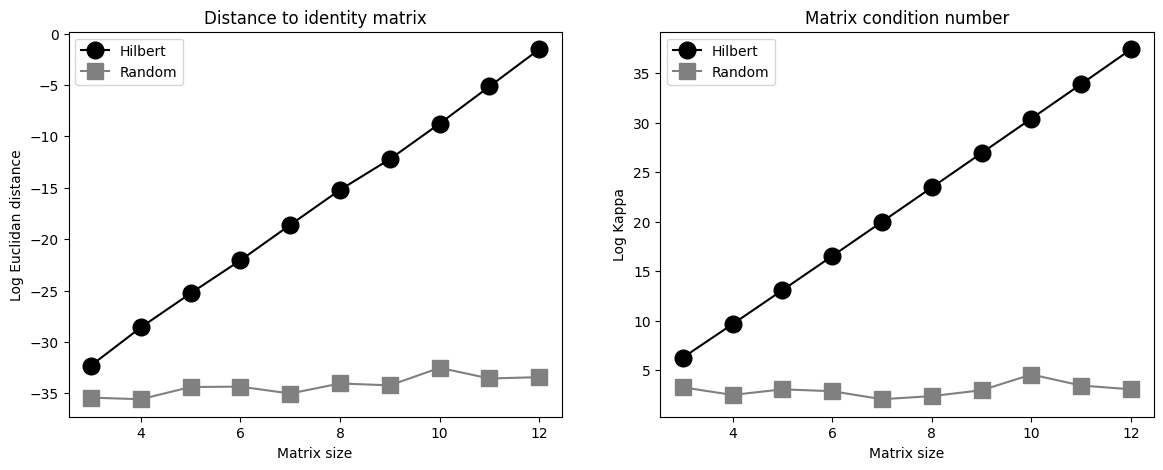

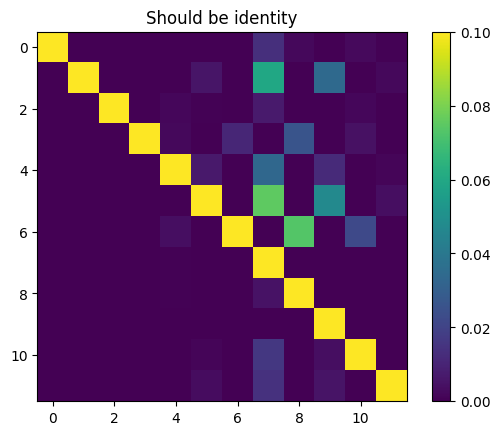

In [31]:
# 정답

matSizes = np.arange(3,13)

identityError = np.zeros((len(matSizes),2))
condNumbers   = np.zeros((len(matSizes),2))


for i,k in enumerate(matSizes):

    ### for the Hilbert matrix
    H   = hilbmat(k)       # the matrix
    Hi  = np.linalg.inv(H) # its inverse
    HHi = H@Hi             # should be identity
    err = HHi - np.eye(k)  # difference from true identity
    identityError[i,0] = np.sqrt(np.sum(err**2))  # Euclidean distance
    condNumbers[i,0] = np.linalg.cond(H) # condition number


    ### repeat for a random matrix
    H = np.random.randn(k,k) # the matrix
    Hi  = np.linalg.inv(H)   # its inverse
    HHi = H@Hi               # should be identity
    err = HHi - np.eye(k)    # difference from true identity
    identityError[i,1] = np.sqrt(np.sum(err**2))  # Euclidean distance
    condNumbers[i,1] = np.linalg.cond(H) # condition number

# now plot
fig,axs = plt.subplots(1,2,figsize=(14,5))

## plot the Euclidean distance to the identity matrix
h = axs[0].plot(matSizes,np.log(identityError),'s-',markersize=12)
h[0].set_color('k') # adjust the individual line colors and shapes
h[0].set_marker('o')
h[1].set_color('gray')

axs[0].legend(['Hilbert','Random'])
axs[0].set_xlabel('Matrix size')
axs[0].set_ylabel('Log Euclidan distance')
axs[0].set_title('Distance to identity matrix')



## plot the condition numbers
h = axs[1].plot(matSizes,np.log(condNumbers),'s-',markersize=12)
h[0].set_color('k') # adjust the individual line colors and shapes
h[0].set_marker('o')
h[1].set_color('gray')

axs[1].legend(['Hilbert','Random'])
axs[1].set_xlabel('Matrix size')
axs[1].set_ylabel('Log Kappa')
axs[1].set_title('Matrix condition number')

plt.savefig('Figure_07_07.png',dpi=300)
plt.show()


## interesting to see the "identity" matrix
H   = hilbmat(k)
Hi  = np.linalg.inv(H)
HHi = H@Hi

plt.imshow(HHi,vmin=0,vmax=.1)
plt.title('Should be identity')
plt.colorbar();